In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

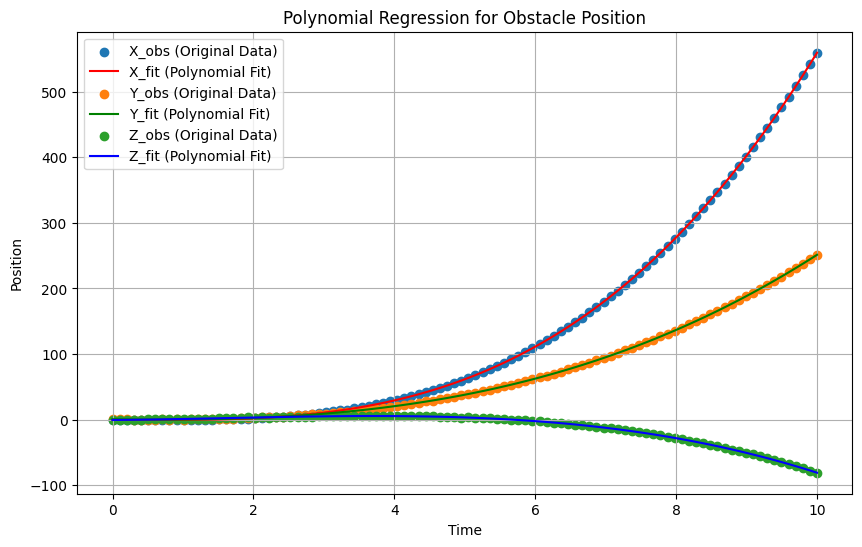

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
t = np.linspace(0, 10, 100)  # Time instants
n = len(t)  # Number of time instants

# Polynomial coefficients
c_x = np.random.randn(4)  # Coefficients for X coordinate
c_y = np.random.randn(4)  # Coefficients for Y coordinate
c_z = np.random.randn(4)  # Coefficients for Z coordinate

# Calculate Xobs, Yobs, Zobs
X_obs = np.sum([c_x[i] * (t ** i) for i in range(len(c_x))], axis=0)
Y_obs = np.sum([c_y[i] * (t ** i) for i in range(len(c_y))], axis=0)
Z_obs = np.sum([c_z[i] * (t ** i) for i in range(len(c_z))], axis=0)

# Add noise (optional)
noise_level = 0.2
X_obs += np.random.normal(0, noise_level, n)
Y_obs += np.random.normal(0, noise_level, n)
Z_obs += np.random.normal(0, noise_level, n)

# Perform polynomial regression
degree = 3  # Degree of the polynomial
poly_x = np.polyfit(t, X_obs, degree)
poly_y = np.polyfit(t, Y_obs, degree)
poly_z = np.polyfit(t, Z_obs, degree)

# Evaluate polynomial functions
X_fit = np.polyval(poly_x, t)
Y_fit = np.polyval(poly_y, t)
Z_fit = np.polyval(poly_z, t)

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(t, X_obs, label='X_obs (Original Data)')
plt.plot(t, X_fit, color='red', label='X_fit (Polynomial Fit)')
plt.scatter(t, Y_obs, label='Y_obs (Original Data)')
plt.plot(t, Y_fit, color='green', label='Y_fit (Polynomial Fit)')
plt.scatter(t, Z_obs, label='Z_obs (Original Data)')
plt.plot(t, Z_fit, color='blue', label='Z_fit (Polynomial Fit)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Polynomial Regression for Obstacle Position')
plt.legend()
plt.grid(True)
plt.show()

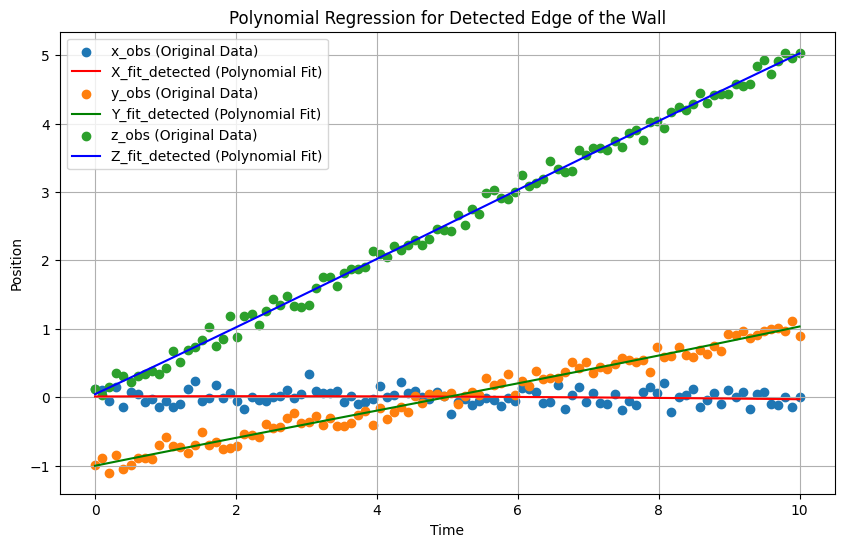

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coordinates of the edge of the wall (L-shaped obstacle)
t = np.linspace(0, 10, 100)  # Time instants
x_obs = np.full_like(t, 0)  # Define x_obs
y_obs = np.linspace(-1, 1, len(t))  # Define y_obs (L-shaped)
z_obs = np.linspace(0, 5, len(t))   # Define z_obs

# Add noise to the generated data if desired
noise_level = 0.1
x_obs += np.random.normal(0, noise_level, len(t))
y_obs += np.random.normal(0, noise_level, len(t))
z_obs += np.random.normal(0, noise_level, len(t))

# Perform polynomial regression on detected coordinates
degree = 3  # Degree of the polynomial
poly_x = np.polyfit(t, x_obs, degree)
poly_y = np.polyfit(t, y_obs, degree)
poly_z = np.polyfit(t, z_obs, degree)

# Evaluate polynomial functions
X_fit_detected = np.polyval(poly_x, t)
Y_fit_detected = np.polyval(poly_y, t)
Z_fit_detected = np.polyval(poly_z, t)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(t, x_obs, label='x_obs (Original Data)')
plt.plot(t, X_fit_detected, color='red', label='X_fit_detected (Polynomial Fit)')
plt.scatter(t, y_obs, label='y_obs (Original Data)')
plt.plot(t, Y_fit_detected, color='green', label='Y_fit_detected (Polynomial Fit)')
plt.scatter(t, z_obs, label='z_obs (Original Data)')
plt.plot(t, Z_fit_detected, color='blue', label='Z_fit_detected (Polynomial Fit)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Polynomial Regression for Detected Edge of the Wall')
plt.legend()
plt.grid(True)
plt.show()


Coefficients: a = -2.0000000000000013 , b = 0.0 , c = 2.0000000000000004


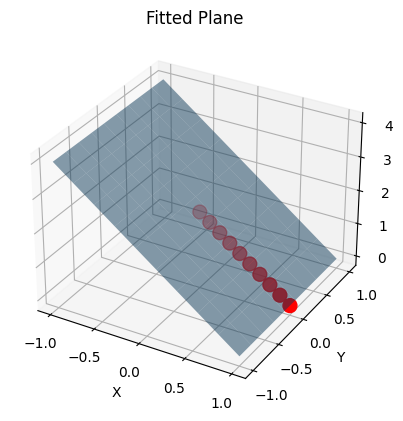

In [5]:
import numpy as np

# Define the points
x = np.linspace(1, 0, 10)
y = np.linspace(0, 0, 10)
# z = np.array([0, 2])
z = np.linspace(0, 2, 10)

# Create the A matrix for the linear equation Ax = b
A = np.column_stack((x, y, np.ones_like(x)))

# Solve the linear equation using least squares method
coefficients, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Extract the coefficients for the plane equation
a, b, c = coefficients

# Print the coefficients
print("Coefficients: a =", a, ", b =", b, ", c =", c)

# Plot the points and the plane
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, color='r', s=100)

# Create a meshgrid for the plane
x_plane = np.linspace(-1, 1, 10)
y_plane = np.linspace(-1, 1, 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = a * x_plane + b * y_plane + c

# Plot the plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Fitted Plane')

# Show the plot
plt.show()

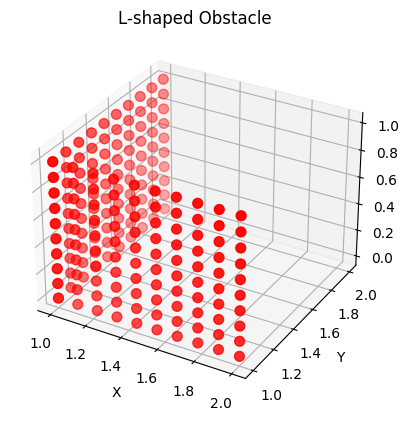

In [6]:
# Generate a meshgrid with x = 1 to 2 and y=1 to 2
x = np.linspace(1, 2, 10)
y = np.linspace(1, 2, 10)
z = np.linspace(0, 1, 10)

# Create a meshgrid of 1 side of the L-shaped obstacle in the xz plane
x1, z1 = np.meshgrid(x, z)
y1 = np.ones_like(x1)

# Create a meshgrid of the other side of the L-shaped obstacle in the yz plane
y2, z2 = np.meshgrid(y, z)
x2 = np.ones_like(y2)

# Combine both sides of the L-shaped obstacle
x_obs = np.concatenate([x1, x2], axis=0)
y_obs = np.concatenate([y1, y2], axis=0)
z_obs = np.concatenate([z1, z2], axis=0)

# Make the obstacles a 1D array
x_obs = x_obs.flatten()
y_obs = y_obs.flatten()
z_obs = z_obs.flatten()

# Plot the L-shaped obstacle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the L-shaped obstacle
ax.scatter(x_obs, y_obs, z_obs, color='r', s=50)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('L-shaped Obstacle')

# Show the plot
plt.show()

In [7]:
x_obs

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ,
       1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444

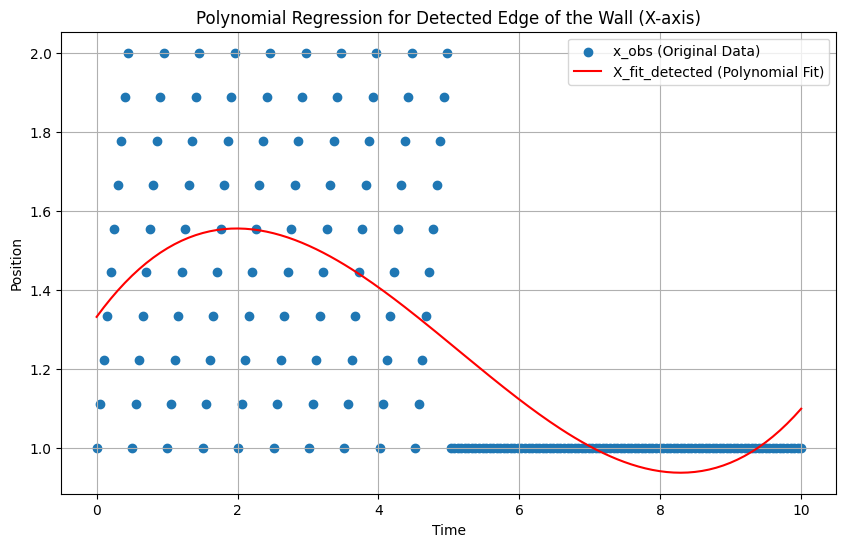

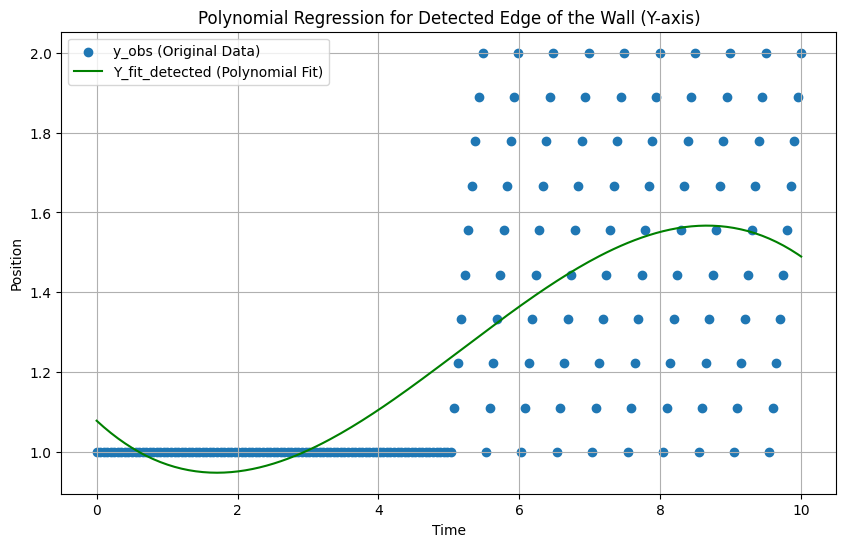

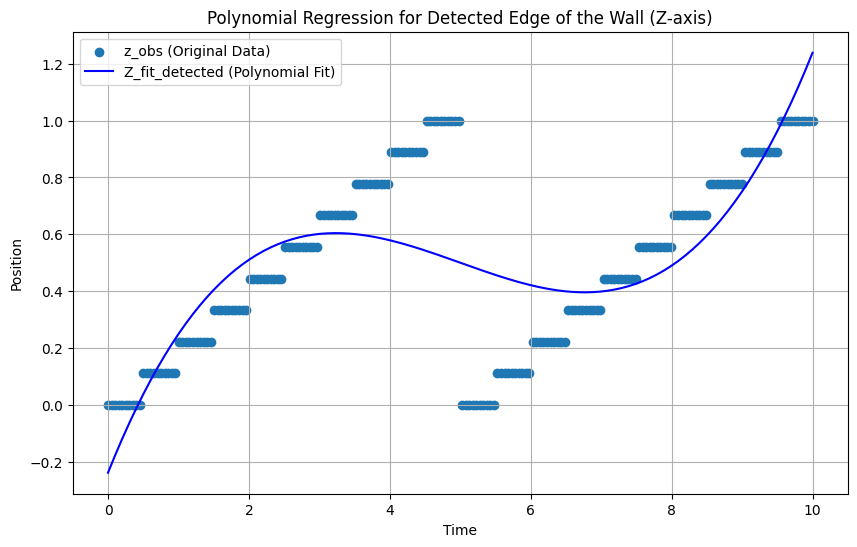

In [8]:
# Fit a 3D curve to the L-shaped obstacle
import numpy as np

# Define the coordinates of the edge of the wall (L-shaped obstacle)
t = np.linspace(0, 10, len(x_obs))  # Time instants

# x_obs = np.full_like(t, 0)  # Define x_obs
# y_obs = np.linspace(-1, 1, len(t))  # Define y_obs (L-shaped)
# z_obs = np.linspace(0, 5, len(t))   # Define z_obs

# # Add noise to the generated data if desired
# noise_level = 0.1
# x_obs += np.random.normal(0, noise_level, len(t))
# y_obs += np.random.normal(0, noise_level, len(t))
# z_obs += np.random.normal(0, noise_level, len(t))

# Perform polynomial regression on detected coordinates
degree = 3  # Degree of the polynomial
poly_x = np.polyfit(t, x_obs, degree)
poly_y = np.polyfit(t, y_obs, degree)
poly_z = np.polyfit(t, z_obs, degree)

# print(poly_x)

# Evaluate polynomial functions
X_fit_detected = np.polyval(poly_x, t)
Y_fit_detected = np.polyval(poly_y, t)
Z_fit_detected = np.polyval(poly_z, t)

# Visualize the results of each dimension on separate plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(t, x_obs, label='x_obs (Original Data)')
plt.plot(t, X_fit_detected, color='red', label='X_fit_detected (Polynomial Fit)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Polynomial Regression for Detected Edge of the Wall (X-axis)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(t, y_obs, label='y_obs (Original Data)')
plt.plot(t, Y_fit_detected, color='green', label='Y_fit_detected (Polynomial Fit)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Polynomial Regression for Detected Edge of the Wall (Y-axis)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(t, z_obs, label='z_obs (Original Data)')
plt.plot(t, Z_fit_detected, color='blue', label='Z_fit_detected (Polynomial Fit)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Polynomial Regression for Detected Edge of the Wall (Z-axis)')
plt.legend()
plt.grid(True)
plt.show()




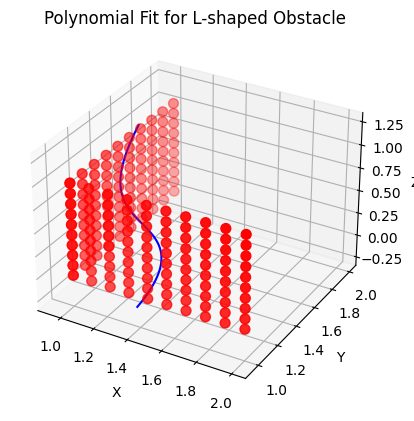

In [9]:
# Plot the polynomial and the original data in 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original data
ax.scatter(x_obs, y_obs, z_obs, color='r', s=50)

# Create a meshgrid for the polynomial
t = np.linspace(0, 10, 100)
x_fit = np.polyval(poly_x, t)
y_fit = np.polyval(poly_y, t)
z_fit = np.polyval(poly_z, t)

# Plot the polynomial
ax.plot(x_fit, y_fit, z_fit, color='b')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Polynomial Fit for L-shaped Obstacle')

# Show the plot
plt.show()